# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [40]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns



### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [41]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'


### Step 3. Assign it to a variable apple

In [4]:
apple=pd.read_csv(url, sep=',')

### Step 4.  Check out the type of the columns

In [21]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [8]:
apple['Date']=pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [9]:
apple.set_index(['Date'], inplace=True)

### Step 7.  Is there any duplicate dates?

In [25]:
apple.duplicated() 

Date
2014-07-08    False
2014-07-07    False
2014-07-03    False
2014-07-02    False
2014-07-01    False
              ...  
1980-12-18    False
1980-12-17    False
1980-12-16    False
1980-12-15    False
1980-12-12    False
Length: 8465, dtype: bool




9### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [10]:
apple.sort_index()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [14]:
apple.resample('BM').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_3636\3030678292.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple.resample('BM').mean()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


### Step 10.  What is the difference in days between the first day and the oldest

In [46]:
old_date=apple.index.min()
first=apple.index.max()
date=(first-old_date)
date


Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [53]:
apple.resample('ME').sum()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,396.26,397.38,395.76,395.76,336212800,6.15
1981-01-31,666.85,668.36,664.75,664.75,152247200,10.37
1981-02-28,503.12,504.87,501.75,501.75,80404800,7.81
1981-03-31,548.63,550.37,546.40,546.40,175179200,8.53
1981-04-30,573.02,574.73,571.77,571.77,134232000,8.89
...,...,...,...,...,...,...
2014-03-31,11205.46,11265.53,11131.49,11197.50,1250424700,1590.75
2014-04-30,11341.72,11431.33,11261.51,11362.56,1608765200,1614.21
2014-05-31,12627.34,12733.83,12564.99,12667.11,1433917100,1807.23


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

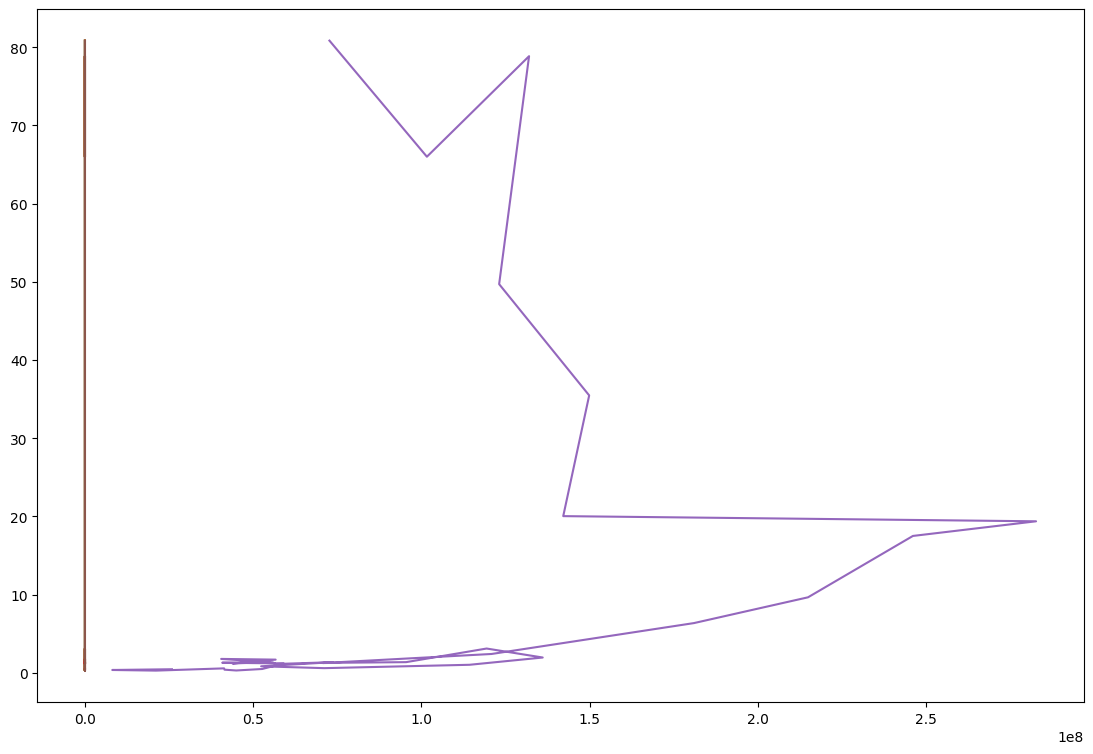

In [64]:


plt.plot(x,y)


### BONUS: Create your own question and answer it.